1. Опробовано кодирование категориальных переменных 2 типами кодировщиков.
2. Исследование влияние скейлера (на представленных данных все показали приблизительно одинаковую эффективность).
3. Исследование влияние типа модели (модели показали приблизительно одинаковую эффективность).

Результаты:

- для улучшения показателей модели было проведено отбрасывание аномальных значений (показатели значительно улучшились).
Хотя при ужесточении критериев эффективность изменилась не сильно, но для дальнейших исследований был выбран более жесткий вариант.

- был добавлен признак, сгенерированный с использованием внешних данных (количество зарегестрированных преступлений в радиусе 5 км от объекта). Взят датасет, содержащий информацию о преступлениях с информацией о координатах и вычислено количество преступлений вблизи каждого объекта недвижимости. Операции проведены в отдельном файле.

Ссылка на добавочный датасет: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243

Эффективность модели немного улучшилась, но незначительно. Признак не сильно информативен.

Вывод:

-основной вклад в эффективность модели вносят данные (чистота от аномалий, информативность признаков).

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [93]:
data = pd.read_csv('AB_NYC_2019.csv', index_col=0)
data.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [94]:
feature_list = ['name', 'host_id', 'host_name', 'last_review']
data = data.drop(feature_list, axis=1)
data.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,
2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.5+ MB


In [96]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# EDA
Поиск скоррелированных признаков

['reviews_per_month', 'number_of_reviews']
0.549867506377398


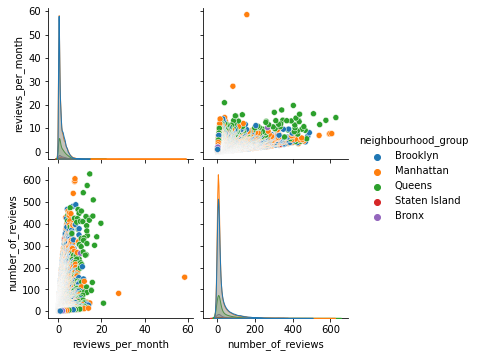

In [97]:
corr_matrix = data.corr()
col_list = corr_matrix.columns.tolist()
corr_features_list = []
k = 0
for col in corr_matrix.columns.tolist():
    col_list.remove(col)
    for ind in col_list:
        if corr_matrix.loc[ind, col] > 0.50:
            sns.pairplot(data.loc[:, [ind, col, 'neighbourhood_group']], hue='neighbourhood_group')
            print([ind, col])
            print(corr_matrix.loc[ind, col])
            k += 1
plt.show()

Наблюдается очень слабая корреляция между признаками 'reviews_per_month', 'number_of_reviews'.

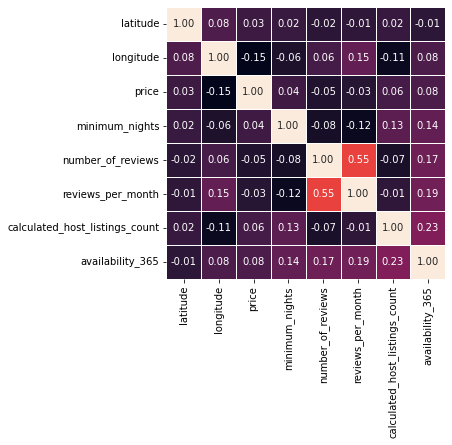

In [98]:
plt.figure(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

Посмотрим распределение признаков.

Column "neighbourhood_group" distribution


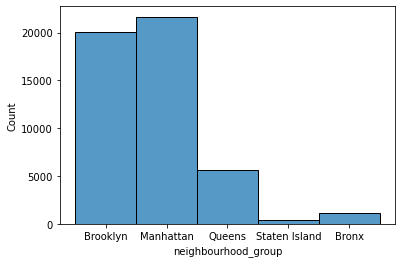

Column "neighbourhood" distribution


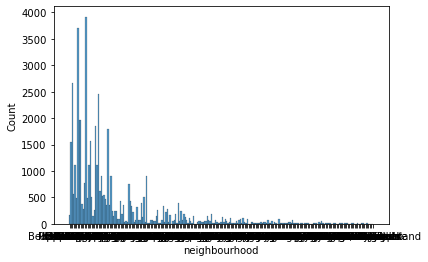

Column "latitude" distribution


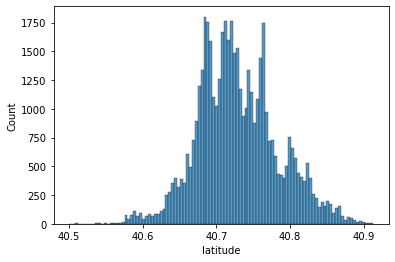

Column "longitude" distribution


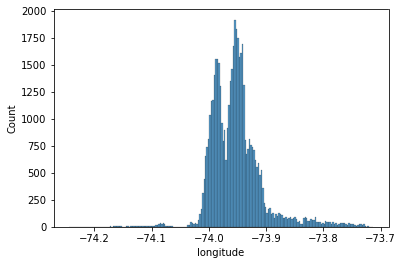

Column "room_type" distribution


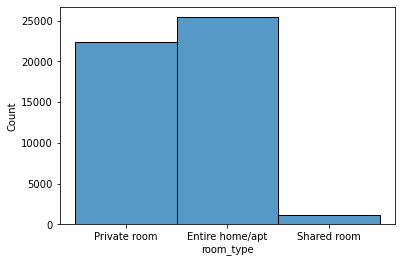

Column "price" distribution


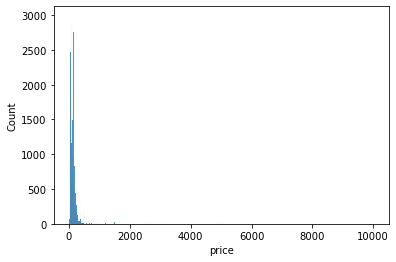

Column "minimum_nights" distribution


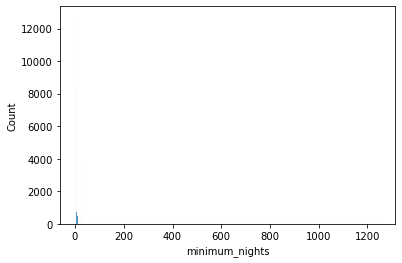

Column "number_of_reviews" distribution


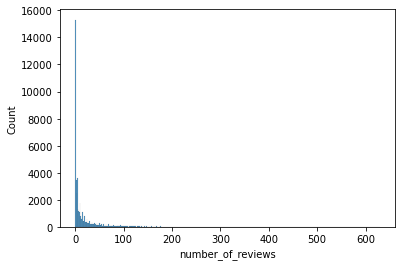

Column "reviews_per_month" distribution


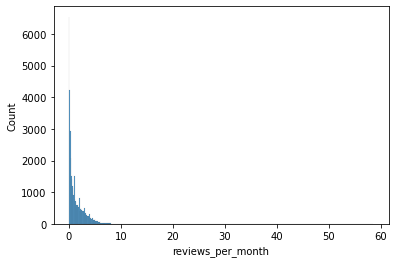

Column "calculated_host_listings_count" distribution


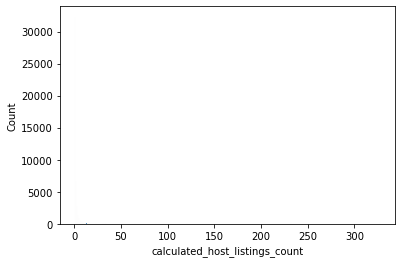

Column "availability_365" distribution


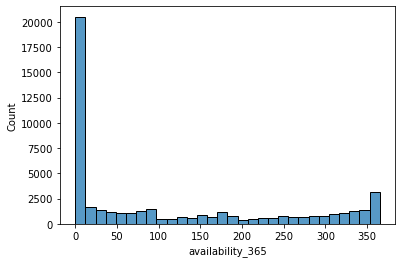

In [99]:
for col in data.columns.tolist():
    print(f'Column "{col}" distribution');
    hist = sns.histplot(data=data[col], label=f'Column "{col}" distribution');
    plt.show();

['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


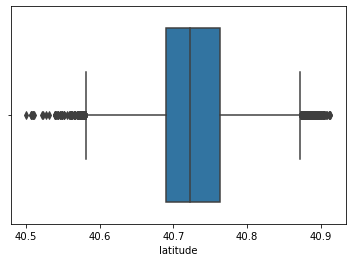

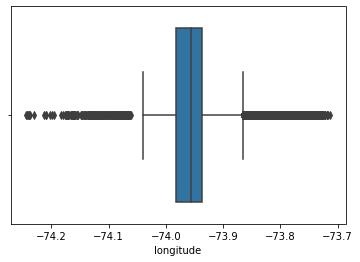

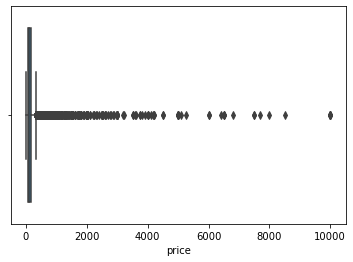

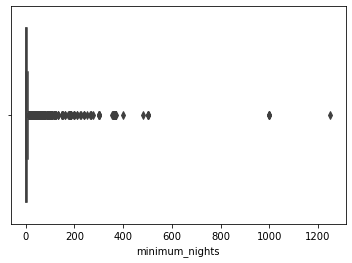

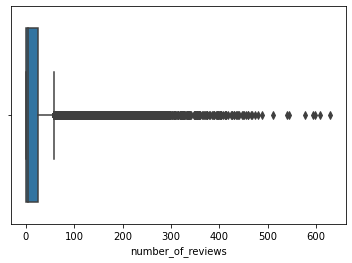

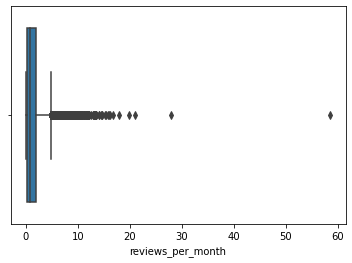

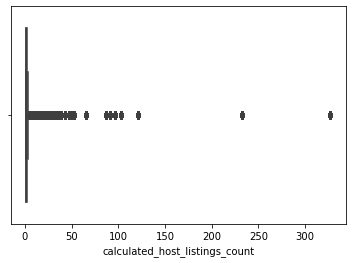

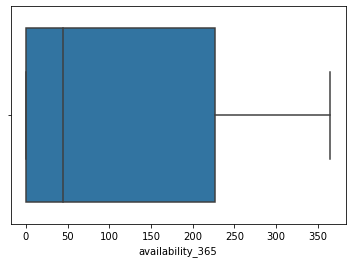

In [100]:
columns = data.columns.tolist()
columns.remove('neighbourhood_group')
columns.remove('neighbourhood')
columns.remove('room_type')
print(columns)
for feature in columns:
    sns.boxplot(x=feature, data=data)
    plt.show();

# Пропуски данных
Есть пропуски в данных. Исследуем.

In [101]:
np.round(data.isna().sum()[data.isna().sum()>0] / data.shape[0], 2)

reviews_per_month    0.21
dtype: float64

Достаточно значительная часть данных отсутствует. Либо дропнуть признак, либо заполнить.

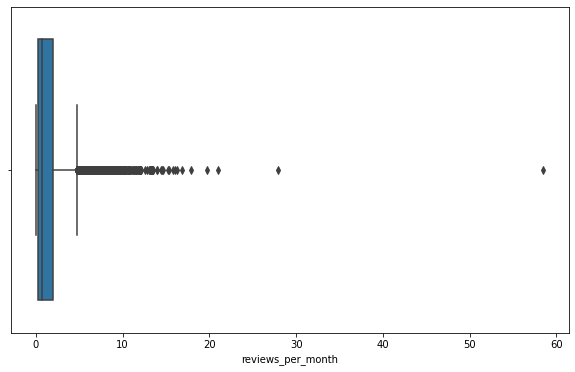

In [102]:
plt.figure(figsize=(10,6));
sns.boxplot(data.reviews_per_month);
plt.show();

<Figure size 1600x1600 with 0 Axes>

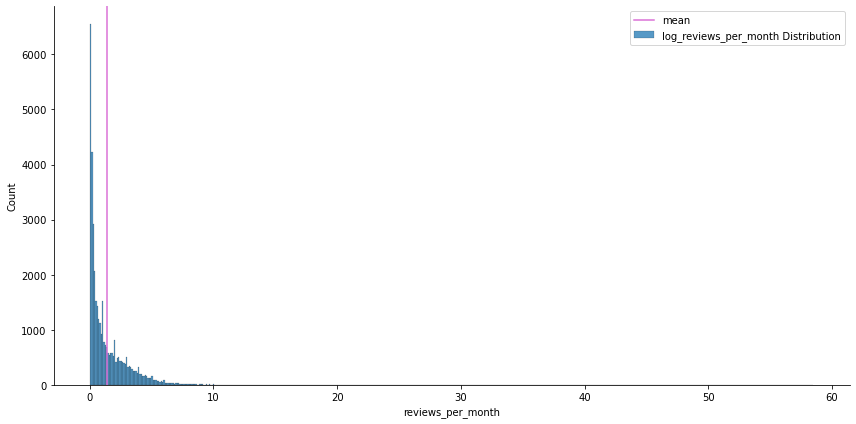

In [103]:
plt.figure(figsize=(8,8), dpi=200);
sns.displot(data.reviews_per_month, label='log_reviews_per_month Distribution', height=6, aspect=2);
plt.axvline(data.reviews_per_month.mean(), label='mean', c='orchid');
plt.legend();
plt.show();

Распределение признака асимметрично. Заполним пропуски mean.

In [104]:
data.reviews_per_month.corr(data.price)

-0.030608348567533118

In [105]:
data.reviews_per_month.fillna(data.reviews_per_month.mean()).corr(data.price)

-0.022372736596075544

После заполнения пропусков mean корреляция меняется незначительно.

In [106]:
data.reviews_per_month = data.reviews_per_month.fillna(data.reviews_per_month.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 5.5+ MB


# Закодируем категориальные признаки

In [107]:
print('For feature neighbourhood_group: ', data.neighbourhood_group.nunique())
print('For neighbourhood: ', data.neighbourhood.nunique())
print('For room_type: ', data.room_type.nunique())

For feature neighbourhood_group:  5
For neighbourhood:  221
For room_type:  3


Уникальных значений в признаках neighbourhood_group и room_type немного, применим One_Hot Encoding.

In [108]:
from category_encoders import OneHotEncoder

colms_encod = ['neighbourhood_group', 'room_type']
encoder_nei_gr = OneHotEncoder()
coded_data = encoder_nei_gr.fit_transform(data['neighbourhood_group'])
data = data.drop(['neighbourhood_group'], axis = 1).join(coded_data)

encoder_room_t = OneHotEncoder()
coded_data = encoder_room_t.fit_transform(data['room_type'])
data = data.drop(['room_type'], axis = 1).join(coded_data)

data.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,room_type_1,room_type_2,room_type_3
id,,,,,,,,,,,,,,,,,
2539,Kensington,40.64749,-73.97237,149,1,9,0.210000,6,365,1,0,0,0,0,1,0,0
2595,Midtown,40.75362,-73.98377,225,1,45,0.380000,2,355,0,1,0,0,0,0,1,0
3647,Harlem,40.80902,-73.94190,150,3,0,1.373221,1,365,0,1,0,0,0,1,0,0
3831,Clinton Hill,40.68514,-73.95976,89,1,270,4.640000,1,194,1,0,0,0,0,0,1,0
5022,East Harlem,40.79851,-73.94399,80,10,9,0.100000,1,0,0,1,0,0,0,0,1,0


Для neighbourhood применим target encoder.

In [109]:
!pip install category_encoders

Закодируем оставшийся признак. Корреляция между частотой объектов определенным значением может говорить либо о густозаселенности района (при одинакомом проценте продаваемого жилья абсолютное число выше в более населенном районе), либо о его неблагополучности (люди избавляются от недвижимости и переезжают). В нашем случае корреляция может быть даже полезна. Применим CountEncoder.

In [110]:
from category_encoders import CountEncoder
encoder = CountEncoder()
data['neighbourhood_encoded'] = encoder.fit_transform(data['neighbourhood'], data['price'])
data = data.drop(['neighbourhood'], axis=1)
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,room_type_1,room_type_2,room_type_3,neighbourhood_encoded
id,,,,,,,,,,,,,,,,,
2539,40.64749,-73.97237,149,1,9,0.210000,6,365,1,0,0,0,0,1,0,0,175
2595,40.75362,-73.98377,225,1,45,0.380000,2,355,0,1,0,0,0,0,1,0,1545
3647,40.80902,-73.94190,150,3,0,1.373221,1,365,0,1,0,0,0,1,0,0,2658
3831,40.68514,-73.95976,89,1,270,4.640000,1,194,1,0,0,0,0,0,1,0,572
5022,40.79851,-73.94399,80,10,9,0.100000,1,0,0,1,0,0,0,0,1,0,1117


# Построим пробную модель

# Разделим выборку на train и test.

In [111]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
Y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=18)

# Масштабируем данные

In [112]:
def scale_data(scaler, X_train, X_test):
    scaler = scaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    return scaled_X_train, scaled_X_test

# Строим модель

In [113]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def rmse(y_pred, y):
    return np.sqrt(mean_squared_error(y_pred, y))

def err_check(y_train, y_train_pred, y_test, y_pred):   
    print('MAE train: ', np.round(mean_absolute_error(y_train, y_train_pred), 2))
    print('MAE test: ', np.round(mean_absolute_error(y_test, y_pred), 2))
    print('RMSE train: ', np.round(rmse(y_train, y_train_pred), 2))
    print('RMSE test: ', np.round(rmse(y_test, y_pred), 2))
    print('R2 train: ', np.round(r2_score(y_train, y_train_pred), 2))
    print('R2 test: ', np.round(r2_score(y_test, y_pred), 2))

In [114]:
def model_results(model, scaler, X_train, X_test, y_train, y_test):
    scaled_X_train, scaled_X_test = scale_data(scaler, X_train, X_test)
    model = model()
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)
    y_train_pred = model.predict(scaled_X_train)
    print(model, scaler)
    err_check(y_train, y_train_pred, y_test, y_pred)

In [115]:
def feature_importance(model, columns):
    
    plt.figure(figsize=(8,6), dpi=200);
    featureImportance = pd.DataFrame({"feature": X.columns, 
                                      "importance": model.coef_})
    featureImportance.set_index('feature', inplace=True)
    featureImportance.sort_values(['importance'], ascending=False, inplace=True)
    featureImportance.plot.bar();
    plt.show();
    print(featureImportance.head(20))

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

models = [LinearRegression]
scalers = [StandardScaler]
for model in models:
    for scaler in scalers:
        model_results(model, scaler, X_train, X_test, y_train, y_test)   

LinearRegression() <class 'sklearn.preprocessing._data.StandardScaler'>
MAE train:  71.95
MAE test:  75.43
RMSE train:  208.38
RMSE test:  268.31
R2 train:  0.11
R2 test:  0.08


# Отбрасывание аномалий

В данных присутствуют выбросы. Теперь проведем отбрасывание выбросов в данных и проверим, как изменятся результаты моделей.

1.0


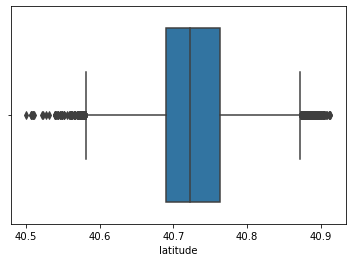

0.98


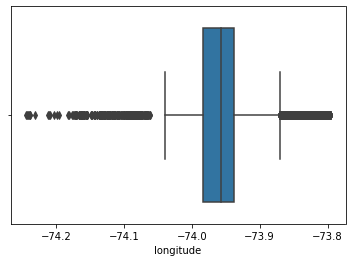

0.97


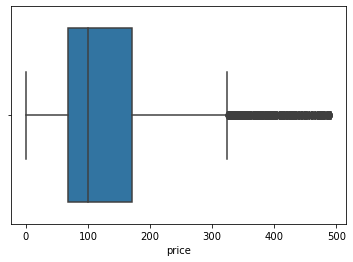

0.99


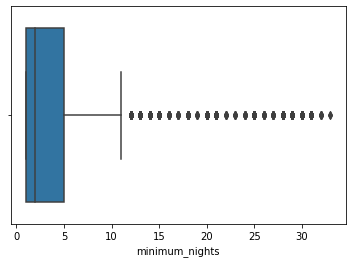

0.93


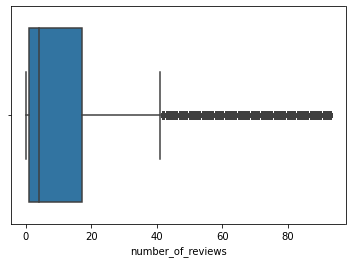

0.98


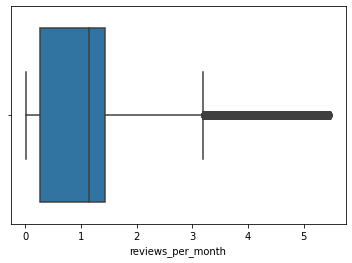

0.94


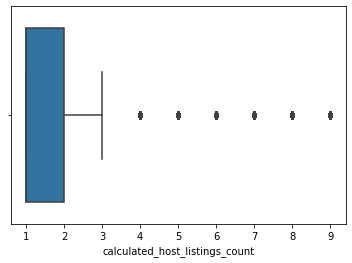

1.0


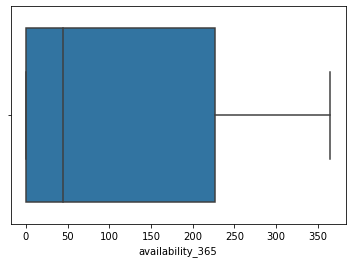

In [117]:
columns = data.columns.tolist()
columns = columns[:8]
for feature in columns:
    k = 7 if feature in ['minimum_nights', 'calculated_host_listings_count'] else 3
    perc_75, perc_25 = np.percentile(data[feature],[75, 25])
    IQR = perc_75 - perc_25
    print(np.round(data.drop(data[data[feature] > perc_75 + k*IQR].index, axis=0).shape[0] / data.shape[0], 2))
    sns.boxplot(x=feature, data=data.drop(data[(data[feature] > perc_75 + k*IQR)].index, axis=0))
    plt.show();

In [118]:
for feature in columns:
    k = 7 if feature in ['minimum_nights', 'calculated_host_listings_count'] else 3
    perc_75, perc_25 = np.percentile(data[feature],[75, 25])
    IQR = perc_75 - perc_25
    data = data.drop(data[data[feature] > perc_75 + k*IQR].index, axis=0)

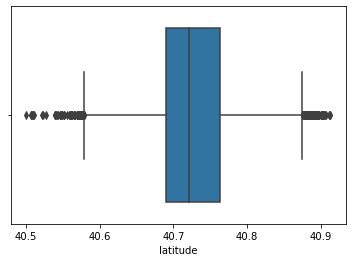

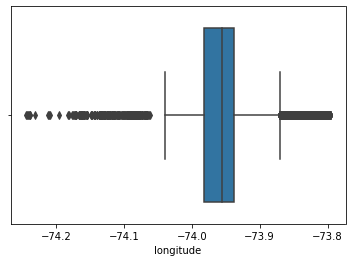

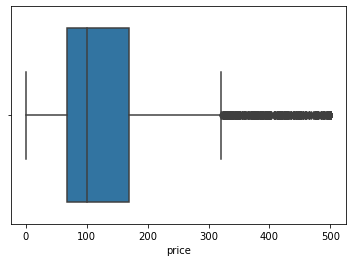

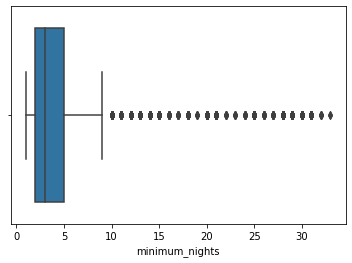

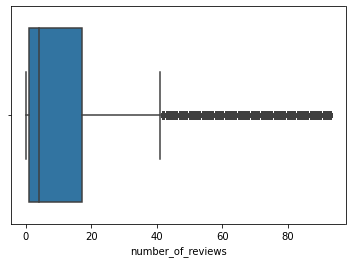

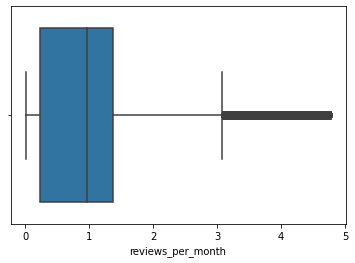

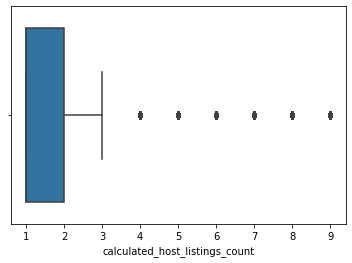

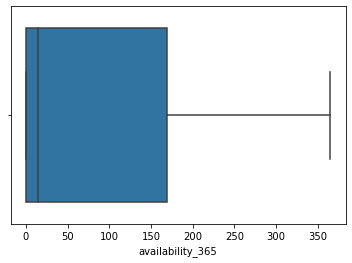

In [119]:
for feature in columns:
    sns.boxplot(x=feature, data=data)
    plt.show();

# Проверка улучшения после отбрасывания аномалий

In [120]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
Y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=18)

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

models = [LinearRegression]
scalers = [StandardScaler]
for model in models:
    for scaler in scalers:
        model_results(model, scaler, X_train, X_test, y_train, y_test)    

LinearRegression() <class 'sklearn.preprocessing._data.StandardScaler'>
MAE train:  45.77
MAE test:  45.61
RMSE train:  67.22
RMSE test:  66.51
R2 train:  0.41
R2 test:  0.43


Ужесточим отбрасывание

In [122]:
columns = data.columns.tolist()
columns = columns[:8]
for feature in columns:
    k = 3 if feature in ['minimum_nights', 'calculated_host_listings_count'] else 1.5
    perc_75, perc_25 = np.percentile(data[feature],[75, 25])
    IQR = perc_75 - perc_25
    data_2 = data.drop(data[data[feature] > perc_75 + k*IQR].index, axis=0)

In [123]:
from sklearn.model_selection import train_test_split

X = data_2.drop('price', axis=1)
Y = data_2['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=18)

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

models = [LinearRegression]
scalers = [StandardScaler]
for model in models:
    for scaler in scalers:
        model_results(model, scaler, X_train, X_test, y_train, y_test)

LinearRegression() <class 'sklearn.preprocessing._data.StandardScaler'>
MAE train:  45.77
MAE test:  45.61
RMSE train:  67.22
RMSE test:  66.51
R2 train:  0.41
R2 test:  0.43


Разница незаметна

# Проверка улучшения после добавления новых данных

In [125]:
new_data = pd.read_csv('data_with_crimes.csv', index_col=0)
new_data.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,crimes
id,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,67569
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,101104
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,102483
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,91131
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,102782


In [126]:
# дропнем не используемые колонки
feature_list = ['name', 'host_id', 'host_name', 'last_review']
new_data = new_data.drop(feature_list, axis=1)
# заполним пропуски
new_data.reviews_per_month = new_data.reviews_per_month.fillna(
    data.reviews_per_month.mean())
# закодируем категориальные данные
colms_encod = ['neighbourhood_group', 'room_type']
encoder_nei_gr = OneHotEncoder()
coded_data = encoder_nei_gr.fit_transform(new_data['neighbourhood_group'])
new_data = new_data.drop(['neighbourhood_group'], axis = 1).join(coded_data)

encoder_room_t = OneHotEncoder()
coded_data = encoder_room_t.fit_transform(new_data['room_type'])
new_data = new_data.drop(['room_type'], axis = 1).join(coded_data)

encoder = CountEncoder()
new_data['neighbourhood_encoded'] = encoder.fit_transform(new_data['neighbourhood'],
                                                          new_data['price'])
new_data = new_data.drop(['neighbourhood'], axis=1)

# отбросим аномалии
columns = new_data.columns.tolist()
columns = columns[:8]
for feature in columns:
    k = 3 if feature in ['minimum_nights', 'calculated_host_listings_count'] else 1.5
    perc_75, perc_25 = np.percentile(new_data[feature],[75, 25])
    IQR = perc_75 - perc_25
    new_data = new_data.drop(new_data[new_data[feature] > perc_75 + k*IQR].index, axis=0)

In [127]:
new_data.tail()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,crimes,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,room_type_1,room_type_2,room_type_3,neighbourhood_encoded
id,,,,,,,,,,,,,,,,,,
36479230,40.70418,-73.91471,42,7,0,1.075665,1,16,76767,1,0,0,0,0,1,0,0,2465
36481615,40.72585,-73.94001,54,6,0,1.075665,1,15,81551,1,0,0,0,0,1,0,0,1115
36484087,40.76392,-73.99183,125,4,0,1.075665,1,31,88981,0,1,0,0,0,1,0,0,1958
36485431,40.81475,-73.94867,115,10,0,1.075665,1,27,93405,0,1,0,0,0,0,1,0,2658
36487245,40.76404,-73.98933,90,7,0,1.075665,1,23,90943,0,1,0,0,0,1,0,0,1958


In [128]:
X = new_data.drop(['price'], axis=1)
Y = new_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=18)

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

models = [LinearRegression]
scalers = [StandardScaler]
for model in models:
    for scaler in scalers:
        model_results(model, scaler, X_train, X_test, y_train, y_test)

LinearRegression() <class 'sklearn.preprocessing._data.StandardScaler'>
MAE train:  35.46
MAE test:  35.62
RMSE train:  47.58
RMSE test:  47.72
R2 train:  0.48
R2 test:  0.49


In [130]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

models = [LinearRegression, RidgeCV, LassoCV, ElasticNetCV]
scalers = [StandardScaler, MinMaxScaler, RobustScaler]
for model in models:
    for scaler in scalers:
        model_results(model, scaler, X_train, X_test, y_train, y_test)

LinearRegression() <class 'sklearn.preprocessing._data.StandardScaler'>
MAE train:  35.46
MAE test:  35.62
RMSE train:  47.58
RMSE test:  47.72
R2 train:  0.48
R2 test:  0.49
LinearRegression() <class 'sklearn.preprocessing._data.MinMaxScaler'>
MAE train:  35.45
MAE test:  35.61
RMSE train:  47.58
RMSE test:  47.72
R2 train:  0.48
R2 test:  0.49
LinearRegression() <class 'sklearn.preprocessing._data.RobustScaler'>
MAE train:  35.45
MAE test:  35.61
RMSE train:  47.58
RMSE test:  47.72
R2 train:  0.48
R2 test:  0.49
RidgeCV(alphas=array([ 0.1,  1. , 10. ])) <class 'sklearn.preprocessing._data.StandardScaler'>
MAE train:  35.45
MAE test:  35.61
RMSE train:  47.58
RMSE test:  47.72
R2 train:  0.48
R2 test:  0.49
RidgeCV(alphas=array([ 0.1,  1. , 10. ])) <class 'sklearn.preprocessing._data.MinMaxScaler'>
MAE train:  35.45
MAE test:  35.61
RMSE train:  47.58
RMSE test:  47.72
R2 train:  0.48
R2 test:  0.49
RidgeCV(alphas=array([ 0.1,  1. , 10. ])) <class 'sklearn.preprocessing._data.RobustS

# Влияние выбора скейлера

MAE train:  35.45
MAE test:  35.61
RMSE train:  47.58
RMSE test:  47.72
R2 train:  0.48
R2 test:  0.49


<Figure size 1600x1200 with 0 Axes>

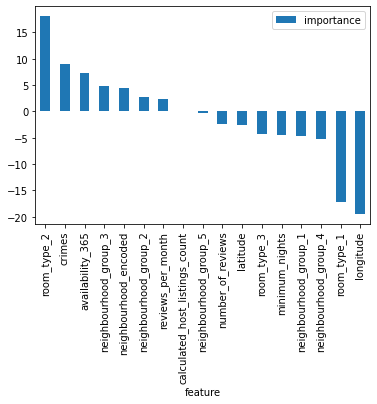

                                importance
feature                                   
room_type_2                      18.097055
crimes                            8.921258
availability_365                  7.321133
neighbourhood_group_3             4.923630
neighbourhood_encoded             4.384992
neighbourhood_group_2             2.810602
reviews_per_month                 2.311226
calculated_host_listings_count    0.000000
neighbourhood_group_5            -0.223593
number_of_reviews                -2.371571
latitude                         -2.530833
room_type_3                      -4.229371
minimum_nights                   -4.526660
neighbourhood_group_1            -4.665616
neighbourhood_group_4            -5.179306
room_type_1                     -17.192572
longitude                       -19.428277


In [131]:
model = RidgeCV()
scaler = StandardScaler
scaled_X_train, scaled_X_test = scale_data(scaler, X_train, X_test)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_train_pred = model.predict(scaled_X_train)
err_check(y_train, y_train_pred, y_test, y_pred)
feature_importance(model, X_train.columns)

MAE train:  35.45
MAE test:  35.61
RMSE train:  47.58
RMSE test:  47.72
R2 train:  0.48
R2 test:  0.49


<Figure size 1600x1200 with 0 Axes>

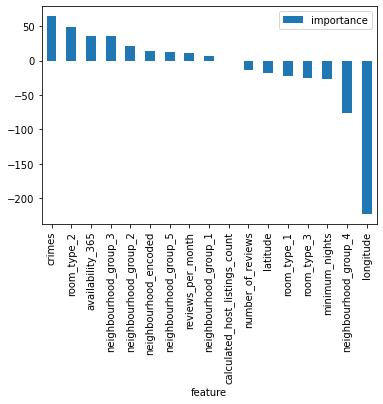

                                importance
feature                                   
crimes                           64.442213
room_type_2                      48.369288
availability_365                 35.578397
neighbourhood_group_3            35.261154
neighbourhood_group_2            21.321826
neighbourhood_encoded            13.652945
neighbourhood_group_5            12.998421
reviews_per_month                10.211962
neighbourhood_group_1             6.271436
calculated_host_listings_count    0.000000
number_of_reviews               -13.698299
latitude                        -17.628917
room_type_1                     -22.776703
room_type_3                     -25.592585
minimum_nights                  -26.204673
neighbourhood_group_4           -75.852836
longitude                      -222.477079


In [132]:
model = RidgeCV()
scaler = MinMaxScaler
scaled_X_train, scaled_X_test = scale_data(scaler, X_train, X_test)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_train_pred = model.predict(scaled_X_train)
err_check(y_train, y_train_pred, y_test, y_pred)
feature_importance(model, X_train.columns)

MAE train:  35.45
MAE test:  35.61
RMSE train:  47.58
RMSE test:  47.72
R2 train:  0.48
R2 test:  0.49


<Figure size 1600x1200 with 0 Axes>

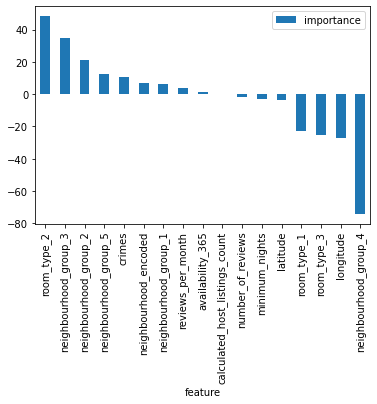

                                importance
feature                                   
room_type_2                      48.311966
neighbourhood_group_3            34.895687
neighbourhood_group_2            20.974334
neighbourhood_group_5            12.397662
crimes                           10.647249
neighbourhood_encoded             6.789138
neighbourhood_group_1             5.990458
reviews_per_month                 3.971841
availability_365                  1.400591
calculated_host_listings_count    0.000000
number_of_reviews                -1.659959
minimum_nights                   -3.274692
latitude                         -3.529354
room_type_1                     -22.823290
room_type_3                     -25.488675
longitude                       -27.408526
neighbourhood_group_4           -74.258142


In [133]:
model = RidgeCV()
scaler = RobustScaler
scaled_X_train, scaled_X_test = scale_data(scaler, X_train, X_test)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_train_pred = model.predict(scaled_X_train)
err_check(y_train, y_train_pred, y_test, y_pred)
feature_importance(model, X_train.columns)

# Влияние выбора модели

MAE train:  35.46
MAE test:  35.62
RMSE train:  47.58
RMSE test:  47.72
R2 train:  0.48
R2 test:  0.49


<Figure size 1600x1200 with 0 Axes>

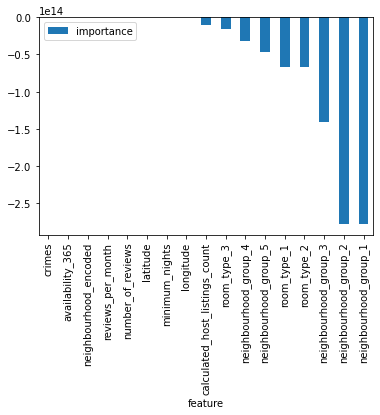

                                  importance
feature                                     
crimes                          8.865409e+00
availability_365                7.371339e+00
neighbourhood_encoded           4.364184e+00
reviews_per_month               2.254313e+00
number_of_reviews              -2.399450e+00
latitude                       -2.647375e+00
minimum_nights                 -4.569514e+00
longitude                      -1.965368e+01
calculated_host_listings_count -1.079608e+13
room_type_3                    -1.524524e+13
neighbourhood_group_4          -3.151520e+13
neighbourhood_group_5          -4.705382e+13
room_type_1                    -6.700425e+13
room_type_2                    -6.721829e+13
neighbourhood_group_3          -1.401491e+14
neighbourhood_group_2          -2.781649e+14
neighbourhood_group_1          -2.782281e+14


In [134]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
scaler = StandardScaler
scaled_X_train, scaled_X_test = scale_data(scaler, X_train, X_test)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_train_pred = model.predict(scaled_X_train)
err_check(y_train, y_train_pred, y_test, y_pred)
feature_importance(model, X_train.columns)

MAE train:  35.45
MAE test:  35.61
RMSE train:  47.58
RMSE test:  47.72
R2 train:  0.48
R2 test:  0.49


<Figure size 1600x1200 with 0 Axes>

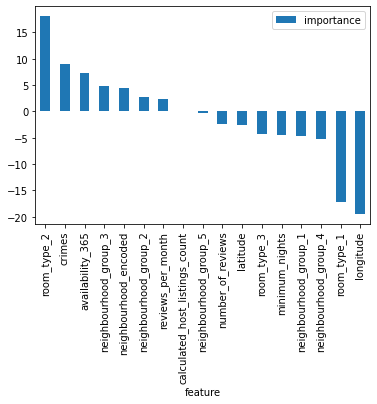

                                importance
feature                                   
room_type_2                      18.097055
crimes                            8.921258
availability_365                  7.321133
neighbourhood_group_3             4.923630
neighbourhood_encoded             4.384992
neighbourhood_group_2             2.810602
reviews_per_month                 2.311226
calculated_host_listings_count    0.000000
neighbourhood_group_5            -0.223593
number_of_reviews                -2.371571
latitude                         -2.530833
room_type_3                      -4.229371
minimum_nights                   -4.526660
neighbourhood_group_1            -4.665616
neighbourhood_group_4            -5.179306
room_type_1                     -17.192572
longitude                       -19.428277


In [135]:
model = RidgeCV()
scaler = StandardScaler
scaled_X_train, scaled_X_test = scale_data(scaler, X_train, X_test)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_train_pred = model.predict(scaled_X_train)
err_check(y_train, y_train_pred, y_test, y_pred)
feature_importance(model, X_train.columns)

MAE train:  35.45
MAE test:  35.61
RMSE train:  47.58
RMSE test:  47.72
R2 train:  0.48
R2 test:  0.49


<Figure size 1600x1200 with 0 Axes>

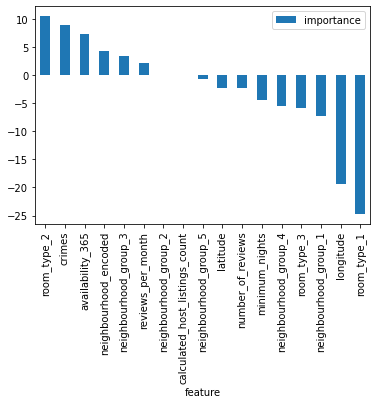

                                importance
feature                                   
room_type_2                      10.548487
crimes                            8.879325
availability_365                  7.277708
neighbourhood_encoded             4.271595
neighbourhood_group_3             3.465907
reviews_per_month                 2.265229
neighbourhood_group_2             0.000000
calculated_host_listings_count    0.000000
neighbourhood_group_5            -0.690935
latitude                         -2.297901
number_of_reviews                -2.302753
minimum_nights                   -4.488473
neighbourhood_group_4            -5.433008
room_type_3                      -5.899040
neighbourhood_group_1            -7.247916
longitude                       -19.424611
room_type_1                     -24.694432


In [136]:
model = LassoCV()
scaler = StandardScaler
scaled_X_train, scaled_X_test = scale_data(scaler, X_train, X_test)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_train_pred = model.predict(scaled_X_train)
err_check(y_train, y_train_pred, y_test, y_pred)
feature_importance(model, X_train.columns)

MAE train:  35.46
MAE test:  35.62
RMSE train:  47.61
RMSE test:  47.76
R2 train:  0.48
R2 test:  0.49


<Figure size 1600x1200 with 0 Axes>

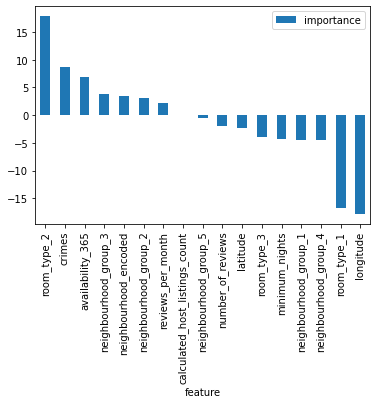

                                importance
feature                                   
room_type_2                      17.862567
crimes                            8.660583
availability_365                  6.869250
neighbourhood_group_3             3.810455
neighbourhood_encoded             3.482282
neighbourhood_group_2             3.032203
reviews_per_month                 2.167900
calculated_host_listings_count    0.000000
neighbourhood_group_5            -0.506504
number_of_reviews                -2.036567
latitude                         -2.374064
room_type_3                      -4.009550
minimum_nights                   -4.224748
neighbourhood_group_1            -4.577003
neighbourhood_group_4            -4.578277
room_type_1                     -16.826992
longitude                       -17.808166


In [137]:
model = ElasticNetCV()
scaler = StandardScaler
scaled_X_train, scaled_X_test = scale_data(scaler, X_train, X_test)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_train_pred = model.predict(scaled_X_train)
err_check(y_train, y_train_pred, y_test, y_pred)
feature_importance(model, X_train.columns)